In [30]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from keras.preprocessing.text import Tokenizer

In [2]:
df = pd.read_csv('Data/Usecase3_Dataset.csv')
df.tail(2)

,airline_sentiment,airline,text
14638,negative,American,"@AmericanAir you have my money, you change my ..."
14639,neutral,American,@AmericanAir we have 8 ppl so we need 2 know h...


# Exploratory Data Analysis

* The Dataset has 3 coloumns and 14640 rows with no NULL values
* 3 Unique Sentiments - Neutral, Positive and Negative
* 6 Unique Airlines - Virgin America, United, Southwest, Delta, US Airways and American

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
airline_sentiment    14640 non-null object
airline              14640 non-null object
text                 14640 non-null object
dtypes: object(3)
memory usage: 343.2+ KB


In [4]:
df.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


* Overall Percentage Breakdown of Sentiments
* Negative Sentiments = 62.7%
* Positive Sentiments = 16.1%
* Neutral Sentments = 21.2%

In [5]:
total_cnt = df['airline_sentiment'].count()
sen_category_cnt = df['airline_sentiment'].value_counts()
sen_category_per = sen_category_cnt/total_cnt

print('No. of Tweets per Sentiment Category in the Dataset:\n ')
print(sen_category_cnt)

No. of Tweets per Sentiment Category in the Dataset:
 
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Percentage of Tweets per Sentiment Category in the Dataset


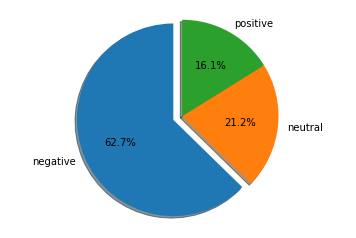

In [6]:
print('Percentage of Tweets per Sentiment Category in the Dataset')
# print(sen_category_per)

labels = 'negative', 'neutral', 'positive'
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sen_category_per, explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

* Sentiment Distribution across Airlines - 

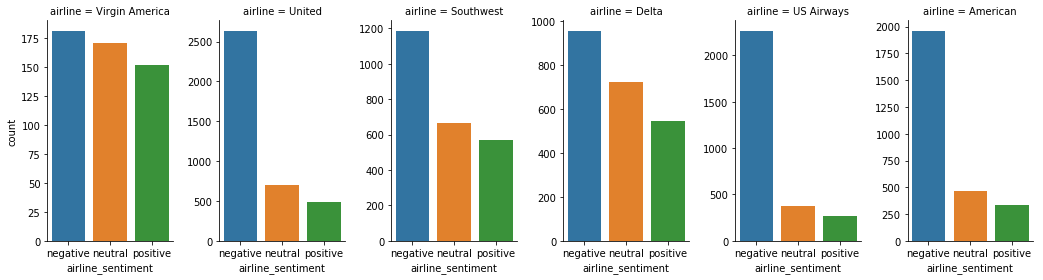

In [8]:
sns.factorplot(x   = 'airline_sentiment',
               data=df,
               order=['negative','neutral','positive'],
               kind = 'count',
               #col_wrap=3,
               col='airline',
               size=4,
               aspect=0.6,
               sharex=False,
               sharey=False)
plt.show()

# Text Cleaning Function

* Step 1: Coonvert entire text to lower
* Step 2: Remove words starting with @ or digits, and alphanumeric words
* Step 3: Replace frequently used short words with actual words
* Step 4: Strip extra whitespaces

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [10]:
df['cleaned_text'] = df['text'].map(lambda txt : clean_text(txt))
df['cleaned_text'][10]

'did you know that suicide is the second leading cause of death among teens 10 24'

# Words Used with Hashtag extraction Function

* Top10 #words with Negative,Positive and Neutral Sentiments Distribution

In [11]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from non racist/sexist tweets

HT_neutral = hashtag_extract(df['text'][df['airline_sentiment'] == 'neutral'])
HT_positive = hashtag_extract(df['text'][df['airline_sentiment'] == 'positive'])
HT_negative = hashtag_extract(df['text'][df['airline_sentiment'] == 'negative'])

HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

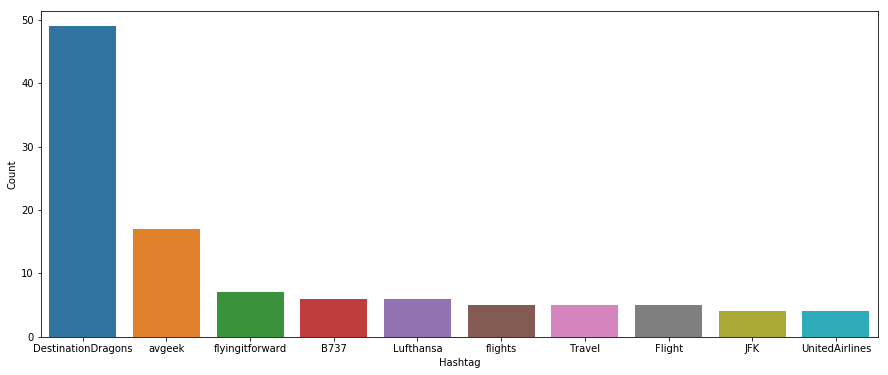

In [39]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,6))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

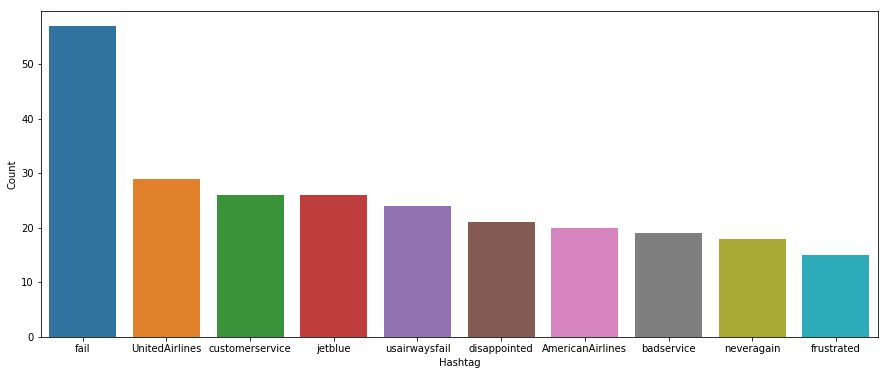

In [35]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,6))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

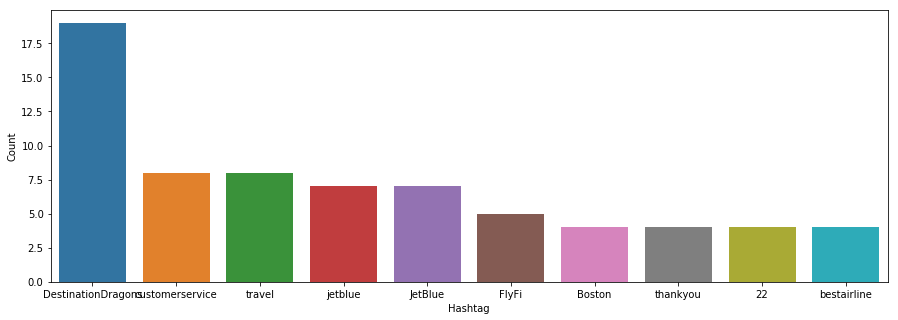

In [38]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Train-Test Split of given Dataset

* 67% of Data ,i.e., 9808 rows Used for building Training Set
* 33% of Data ,i.e., 4832 rows Used for building Testing Set

In [40]:
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

X_train = train.cleaned_text
X_test = test.cleaned_text
y_train = train.airline_sentiment
y_test = test.airline_sentiment

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9808,) (9808,)
(4832,) (4832,)


# Tokenization

* Preparing the Vocabulary by separating the pieces of text (corpus) into smaller units (tokens).
* Here, tokens can be either words, characters, or subwords.
* Mode applied - TF-IDF (term frequency–inverse document frequency)

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_vec = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test_vec = tokenizer.texts_to_matrix(X_test, mode='tfidf')

print('X_train_vec.shape: ', X_train_vec.shape)
print('X_test_vec.shape: ', X_test_vec.shape)

X_train_vec.shape:  (9808, 10680)
X_test_vec.shape:  (4832, 10680)


# Training 

* Logistic Regression Model Applied.

In [56]:
df_pred = test.copy()
df_pred['org_airline_sentiment'] = y_test
df_pred.reset_index(inplace=True)
df_pred.head()

,index,airline_sentiment,airline,text,cleaned_text,org_airline_sentiment
0,4794,positive,Southwest,@SouthwestAir you're my early frontrunner for ...,you re my early frontrunner for best airline o...,positive
1,10480,negative,US Airways,@USAirways how is it that my flt to EWR was Ca...,how is it that my flt to ewr was cancelled fli...,negative
2,8067,negative,Delta,@JetBlue what is going on with your BDL to DCA...,what is going on with your bdl to dca flights ...,negative
3,8880,neutral,Delta,@JetBlue do they have to depart from Washingto...,do they have to depart from washington d c,neutral
4,8292,negative,Delta,@JetBlue I can probably find some of them. Are...,i can probably find some of them are the ticke...,negative


In [57]:
lg_clf = LogisticRegression(C=.02).fit(X_train_vec,  y_train)
df_pred['pred_airline_sentiment'] = lg_clf.predict(X_test_vec)

C:\Users\swati.acharjee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swati.acharjee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Model Evaluation

In [58]:
print(classification_report(df_pred['org_airline_sentiment'], df_pred['pred_airline_sentiment']))

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      3085
     neutral       0.66      0.55      0.60       984
    positive       0.78      0.67      0.72       763

    accuracy                           0.80      4832
   macro avg       0.76      0.71      0.73      4832
weighted avg       0.79      0.80      0.80      4832



In [59]:
print('Accuracy: ', np.mean(df_pred['org_airline_sentiment'] == df_pred['pred_airline_sentiment']))

Accuracy:  0.8023592715231788


* Predicted Sentiments on Test Dataset is stored in Customer_Sentiment_Analysis document under Data folder, for reference.

In [60]:
df_pred.to_excel('Data/Customer_Sentiment_Analysis.xlsx')

# WordCloud

* Thematic Analysis
* Most frequently Used Words in Customer Feedback

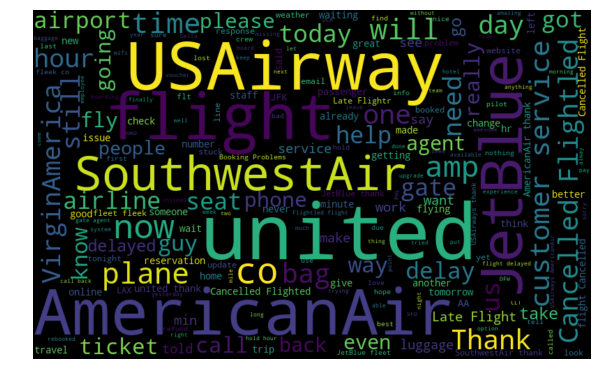

In [67]:
from PIL import Image
#aeroplane = np.array(Image.open( "Data/aeroplane.jpg"))
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(#mask=aeroplane,
                      width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()